In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential

from keras.layers import LSTM, Dense
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

import os.path
import math

In [64]:
# 데이터 불러오기
data = pd.read_csv('/home/siwon/dev/Deeplearning-6/data/trajectory_dataset_transformed.csv')
data = data.iloc[:, :4]  # 데이터의 첫 4개 열만 사용
data= data[data.groupby('id').t.transform('count') >= 11]

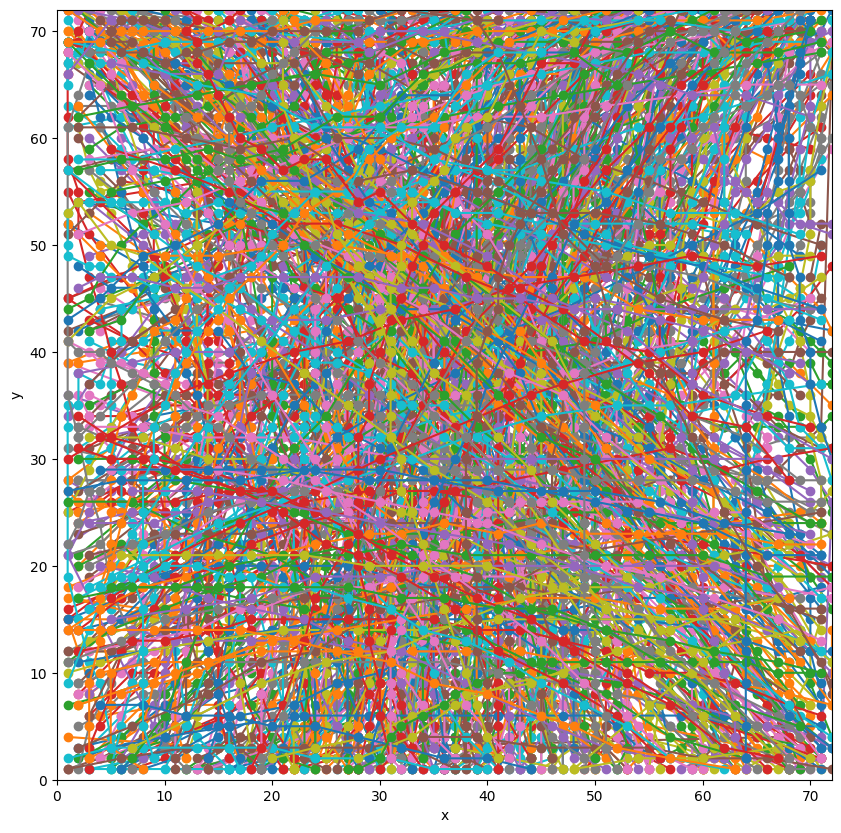

In [65]:
## 데이터셋 먼저 그려보기 모든 id당 t에대해서 직선을 그리자 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_xlim(0, 72)
ax.set_ylim(0, 72)
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(0, data.id.max()):
    ax.plot(data[data['id'] == i]['x'], data[data['id'] == i]['y'], 'o-')
    
plt.show()



In [66]:
## dataset전처리 (id로 묶기)
# id별로 데이터를 묶어서 리스트에 저장
data_list = []
for i in range(0, data.id.max()):
    data_list.append(data[data['id'] == i])
    

In [80]:
input_data = [] 
target_data = [] 

## 10개의 데이터를 입력으로 하여 11번째 데이터를 예측하도록 학습 데이터를 만듭니다.
for i in range(0, len(data_list)):
    for j in range(0, len(data_list[i])-10):
        input_data.append(data_list[i][j:j+10])
        target_data.append(data_list[i][j+10:j+11])
        
input_data = np.array(input_data)
target_data = np.array(target_data)

## 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2, random_state=42)

In [81]:
print(x_train[0],"\n ------ \n",y_train[0])

[[ 66  70 396   0]
 [ 65  67 396   1]
 [ 63  61 396   2]
 [ 62  56 396   3]
 [ 59  50 396   4]
 [ 57  45 396   5]
 [ 55  40 396   6]
 [ 52  35 396   7]
 [ 49  30 396   8]
 [ 46  25 396   9]] 
 ------ 
 [[ 43  21 396  10]]
